<a href="https://colab.research.google.com/github/fyansyarafa/pie-sales-multiple-linear-regression/blob/main/Pie_Sales_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tujuan 

Ditujukan untuk menghasilkan model prediktif (*multiple linear regression*) untuk melakukan prediksi terhadap penjualan pie (`pie_sales`) berdasarkan fitur *independet* (`week`, `price`, `advertising`).

# Import Library & Data 

## Libraries


LIbrary yang akan digunakan
*   Pandas
*   Numpy
* matplotlib.pyplot
* seaborn
* plotly express
* plotly graph object
* statsmodels.api 
* sklearn linear model




In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression



## Data 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df.head()

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0


Melihat informasi yang ada pada dataset, seperti jumlah *entry*/baris, jumlah kolom, tipe data setiap kolom, serta *memory*:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week         15 non-null     int64  
 1   pie_sales    15 non-null     int64  
 2   price        15 non-null     float64
 3   advertising  15 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 608.0 bytes


Semua kolom/fitur bertipe numerik, yang berarti dapat langsung digunakan dalam pembuatan model regresi linear. Juga tidak ada *missing values* pada dataset. 

Melihat deskripsi statistik numerik pada data:

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
week,15.0,8.000000,4.472136,1.0,4.5,8.0,11.50,15.0
pie_sales,15.0,399.333333,63.523524,300.0,350.0,430.0,450.00,490.0
price,15.0,6.613333,1.171609,4.5,5.7,7.0,7.50,8.0
advertising,15.0,3.480000,0.488730,2.7,3.1,3.5,3.85,4.5


# Exploratory Data Analysis

Pada *section* ini, akan dilakukan visualisasi terhadap data sehingga dapat di-*extract* beberapa *insight* secara deskriptif dari data.

## Distribusi Fitur

In [5]:
df.columns

Index(['week', 'pie_sales', 'price', 'advertising'], dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

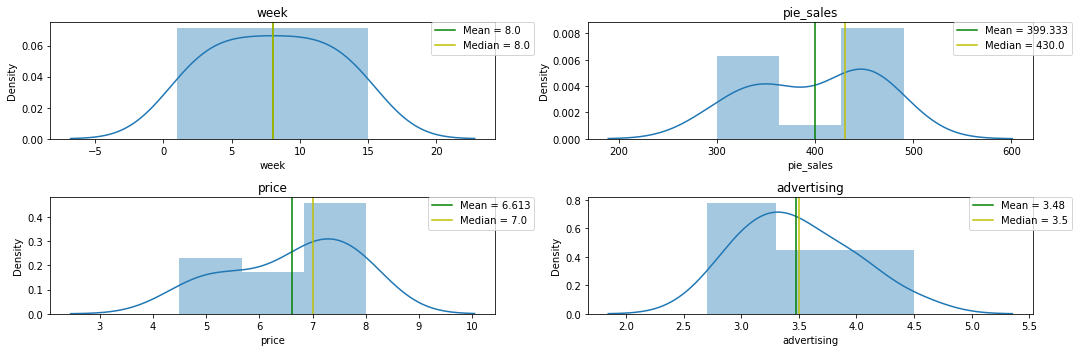

In [20]:
plt.figure(figsize=(15,5))
for i in range(len(df.columns)):
  plt.subplot(2, 2, i+1)
  sns.distplot(df[df.columns[i]])
  plt.title(df.columns[i])
  plt.axvline(df[df.columns[i]].mean(), label='Mean = {}'.format(round(df[df.columns[i]].mean(),3)), color='g')
  plt.axvline(df[df.columns[i]].median(), label='Median = {}'.format(round(df[df.columns[i]].median(),3)), color='y')
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  
plt.tight_layout();

Penjelasan:

*   Week: Pelanggan banyak melakukan pembelian pie di minggu ke-8
*   Pie sales: Terdapat dua grup besar dalam distribusi pie_sales. Grup pertama, dengan rentang 300 sampai sekitar 380 pada jumlah penjualan dan rentang 420 sampai 490. Secara rata-rata, penjualan pie berada pada angka 430.
* Price: Untuk price, lebih variatif dengan rata-rata di harga 7 dollar
* Advertising: Pengeluaran untuk promosi banyak berada pada angka 3.48 dollar. Lebih rendah daripada rata-rata harga satu buah pie.



Melihat hubungan dari masing-masing fitur yang berisi variabel variabel independen terhadap variabel dependen. Apakah memiliki relasi yang linear atau tidak?

In [134]:
week_piesales = px.scatter(
    df,
    x = 'week', y = 'pie_sales',
    trendline='ols', trendline_color_override='darkblue',
    template = 'seaborn',
    title = 'Regression fit: Week vs Pie sales'
)

price_piesales = px.scatter(
    df,
    x = 'price', y = 'pie_sales',
    trendline='ols', trendline_color_override='darkblue',
    template = 'seaborn',
    title = 'Regression fit: Price vs Pie sales'
)

advertising_piesales = px.scatter(
    df,
    x = 'advertising', y = 'pie_sales',
    trendline='ols', trendline_color_override='darkblue',
    template= 'seaborn',
    title = 'Regression fit: Advertising vs Pie sales'
)

## Week - Pie Sales

In [139]:
week_piesales_line = go.Figure()
week_piesales_line.add_trace(go.Scatter(x=df['week'], y=df['pie_sales'],
                    mode='lines+markers'))
week_piesales_line.update_layout(title='Total pie terjual per minggu',
                   xaxis_title='Week',
                   yaxis_title='Pie Sales')

week_piesales_line.show()

Grafik di atas menunjukkan bahwa penjualan pie fluktuatif pada awal minggu, hingga mencapai puncaknya di minggu ke-10 dengan total penjualan pie 490 buah. Namun mengalami penurunan tajam dan menjadi paling rendah selama pekan penjualan, tepatnya di minggu ke-12 dengan angka penjualan 300 pie. Sempat naik pada minggu 13 dan 14 namun turun tajam kembali di minggu berkutnya dengan total penjualan yang sama pada minggu ke-12.

### Regression Fit

Digunakan untuk melihat relasi linear fitur independen (`week`) terhadap targetnya (`pie_sales`). Apakah memiliki relasi linear yang kuat atau tidak?

In [140]:
week_piesales.show()

## Price - Pie Sales

In [141]:
price_piesales.show()

## Advertising - Pie Sales

In [137]:
advertising_piesales

# Feature Selection

Di sini, akan dilakukan pemilihan fitur/kolom agar model regresi yang dihasilkan lebih merepresentasikan sebaran data yang sebenarnya. Atau dengan kata lain, untuk menghasilkan model regresi yang kuat.

Pada kolom `week`, sebenarnya terdapat relasi linear dengan arah negatif. Akan tetapi sangat lemah, dengan R square = 0,0046. Oleh karena itu, kolom ini tidak akan diikutkan dalam model.

Kolom `price`, dapat diikutkan ke dalam pembangunan model walaupun dengan R Square 0,196 dan berelasi linear dengan arah negatif.

`advertising` memiliki hubungan linear yang lebih tinggi terhadap pie_sales dengan angka R square 0,309 dan berarah positif. Yang artinya, semakin tinggi pengeluaran untuk promosi, maka akan naik pula total penjualannya. Walaupun dengan kenaikan yang tidak terlalu tinggi.

Jadi, variabel-variabel independen yang akan dilibatkan dalam pembangunan model adalah `price` dan `advertising`.

# Split Data (Independent(Xs) dan Dependent(y))

Dataset akan dibagi menjadi data training dan data testing. Proporsi pembagiannya adalah 25% akan digunakan sebagai data testing, sisanya untuk data training. 

Data training digunakan dalam pembuatan model regresi, sedangkan data testing digunakan sebagai data uji keakuratan model yang dihasilkan.

In [103]:
y = df['pie_sales']
X = df[['price','advertising']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Model Training

## Menggunakan Scikit-learn LinearRegression

In [104]:
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
print('Coefficient (slope) = ', regressor.coef_)
print('Intercept = ', regressor.intercept_)

Coefficient (slope) =  [-26.17250718  75.66278583]
Intercept =  306.0709478818248


Koefisien-koefisien slope/kemiringan garis yang dihasilkan oleh model adalah -26.17250718 dan 75.66278583 serta intersep 306.0709478818248.

Formula Multiple linear regression:

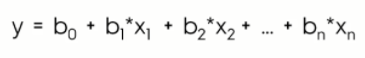



Jika koefisien-koefisien tersebut disubtitusi ke dalam formula, maka model yang dihasilkan memiliki formula:

y = 306.07 - 26.17*x1 + 75.66*x2

Jika diinterpretasikan lebih lanjut, harga 1 unit x1 berada pada angka -26.17. Sedangkan harga 1 unit x2 berada pada angka 75.66.

## Menggunakan Statsmodels
 Selain dengan menggunakan library scikit-learn, model juga dapat dihasilkan dengan statsmodel.api:

In [45]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        15:09:16   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



Model regresi yang dihasilkan oleh statmodel.api adalah

y = 306.52 - 24.97*x1 + 74.13*x2

Dengan R square 0.52.



# Evaluasi Model (Scikit-learn)

Melakukan prediksi `pie_sales`(y_test) pada X_test:

In [144]:
y_predict = regressor.predict(X_test)

Bandingkan terhadap data aktual pada y_test:

In [145]:
y_test

14    300
1     460
6     430
10    340
Name: pie_sales, dtype: int64

Dalam dataframe:

In [143]:
pd.DataFrame({
    'pred':y_predict,
    'actual':y_test
})

,pred,actual
14,327.152919,300
1,359.464337,460
6,415.283023,430
10,382.448647,340


Dapat dilihat, model dapat melakukan prediksi dari model yang dihasilkan pada metode yang ada pada Scikit-learn. Namun, sepertinya model yang dihasilkan masih lemah. Salah satu sebabnya adalah adalah jumlah data yang tidak besar.

Menurut *machine learning algorithm map* pada scikit-learn, dibutuhkan setidaknya 51 jumlah row data agar dapat menghasilkan model yang lebih optimal.

Jika divisualisasikan:

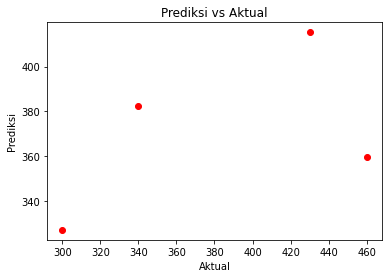

In [108]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Prediksi')
plt.xlabel('Aktual')
plt.title('Prediksi vs Aktual');

## Evaluation Metrics

Akan digunakan RMSE dan R square.

In [149]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [150]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nR2 =', r2)

RMSE =  56.708 
MSE = 3215.7943794485604 
R2 = 0.237737628575156


RMSE menghitung seberapa jauh residual/error yang dihasilkan dari selisih hasil titik aktual dan prediksi yang dihasilkan oleh model. Karena yang diharapkan adalah model yang dihasilkan memiliki selisih jarak yang minim, maka semakin kecil nilai RMSE, maka akan semakin baik model tersebut.

Jika RMSE merupakan standar deviasi dari residual, maka MSE merupakan variansi dari residual. Serupa dengan RMSE, namun MSE berada dalam satuan unit yang berbeda dengan satuan unit pada nilai pada data yang sesungguhnya.

R square berada pada rentang 0-1 yang menunjukkan seberapa terwakilkan/terepresentasikan suatu model dengan sebaran data yang sesungguhnya. Semakin mendekati 1, maka semakin baik. Nilai R2 yang dihasilkan lebih buruk daripada R2 pada statsmodel. Hal ini dapat disebabkan karena pada metode scikit learn, dataset telah dibagi menjadi data training dan data testing sehingga jumlah data yang diproses sebagai model berkurang. Berbeda dengan model pada statsmodel yang menggunakan keseluruhan data.



# Visualisasi Hasil

Jika divisualisasikan dalam bentuk 3D:

In [187]:
from mpl_toolkits.mplot3d import Axes3D
x_surf, y_surf = np.meshgrid(np.linspace(df['advertising'].min(),
                                         df['price'].max(), 10),  
                                         np.linspace(df['advertising'].min(), 
                                                     df['price'].max(), 10))

In [188]:
onlyX = pd.DataFrame({'advertising': x_surf.ravel(), 'price':y_surf.ravel()} ) 
fittedY = regressor.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

Text(0.5, 0, 'Pie Sales')

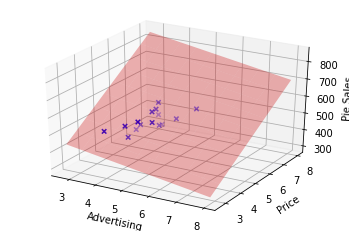

In [189]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['advertising'], df['price'] , df['pie_sales'] , c = 'blue', marker ='x')
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Advertising')
ax.set_ylabel('Price')
ax.set_zlabel('Pie Sales')

# Prediksi data di luar dataset

In [170]:
np.linspace(df['price'].min(),df['price'].max(),10)

array([4.5       , 4.88888889, 5.27777778, 5.66666667, 6.05555556,
       6.44444444, 6.83333333, 7.22222222, 7.61111111, 8.        ])

In [168]:
np.linspace(df['advertising'].min(),df['advertising'].max(),10)

array([2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5])

In [175]:
df_for_pred = pd.DataFrame({
    'price' : np.linspace(df['price'].min(),df['price'].max(),10),
    'advertising': np.linspace(df['advertising'].min(),df['advertising'].max(),10)
})

In [176]:
df_for_pred

,price,advertising
0,4.500000,2.7
1,4.888889,2.9
2,5.277778,3.1
3,5.666667,3.3
4,6.055556,3.5
5,6.444444,3.7
6,6.833333,3.9
7,7.222222,4.1
8,7.611111,4.3
9,8.000000,4.5


Hasil prediksi `pie_sale` berdasarkan `df_for_pred`:

In [177]:
regressor.predict(df_for_pred)

array([392.58418731, 397.53854724, 402.49290717, 407.4472671 ,
       412.40162703, 417.35598696, 422.31034689, 427.26470682,
       432.21906675, 437.17342667])

Dalam bentuk dataframe:

In [178]:
pd.DataFrame({
    'price' : np.linspace(df['price'].min(),df['price'].max(),10),
    'advertising': np.linspace(df['advertising'].min(),df['advertising'].max(),10),
    'pie_sale': regressor.predict(df_for_pred)
})

,price,advertising,pie_sale
0,4.500000,2.7,392.584187
1,4.888889,2.9,397.538547
2,5.277778,3.1,402.492907
3,5.666667,3.3,407.447267
4,6.055556,3.5,412.401627
5,6.444444,3.7,417.355987
6,6.833333,3.9,422.310347
7,7.222222,4.1,427.264707
8,7.611111,4.3,432.219067
9,8.000000,4.5,437.173427


Maka pie dengan harga 4.5 dollar dan dengan biaya promosi 2.7 dollar diprediksi akan terjual dengan jumlah 392.58 buah pie. Dan seterusnya hingga index ke-9.